In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [5]:
#!git clone https://github.com/odedsc/Data_science_project

Cloning into 'Data_science_project'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 40 (delta 19), reused 27 (delta 11), pack-reused 0
Unpacking objects: 100% (40/40), 17.94 MiB | 4.54 MiB/s, done.


In [6]:
os.chdir('Data_science_project')

In [7]:
df = pd.read_csv('processed_dataset.csv', low_memory=False)
pd.options.display.max_columns = None
display(df)

,Unnamed: 0,address/city,address/zipcode,bathrooms,bedrooms,homeStatus,latitude,livingArea,longitude,price,propertyTaxRate,resoFactsStats/bathrooms,resoFactsStats/bathroomsFull,resoFactsStats/bathroomsHalf,resoFactsStats/bedrooms,resoFactsStats/cityRegion,resoFactsStats/garageSpaces,resoFactsStats/hasAttachedGarage,resoFactsStats/hasAttachedProperty,resoFactsStats/hasCooling,resoFactsStats/hasGarage,resoFactsStats/hasHeating,resoFactsStats/hasOpenParking,resoFactsStats/hasView,resoFactsStats/homeType,resoFactsStats/livingArea,resoFactsStats/lotSize,resoFactsStats/parking,resoFactsStats/taxAnnualAmount,resoFactsStats/taxAssessedValue,resoFactsStats/yearBuilt,schools/0/distance,schools/0/level,schools/0/rating,schools/0/size,schools/0/studentsPerTeacher,schools/1/distance,schools/1/level,schools/1/rating,schools/1/size,schools/1/studentsPerTeacher,schools/2/distance,schools/2/isAssigned,schools/2/level,schools/2/rating,schools/2/size,schools/2/studentsPerTeacher,yearBuilt,zpid,number_of_photos,description_exists,description_lengths,priceChangeRate,url_exists
0,0,0,10463.0,2.0,5.0,0,40.877743,1889.0,-73.910866,799999.0,0.88,2.0,1.0,1.0,5.0,0,0,0,0,1.0,0,1.0,0,0,0,1889.0,NaN,0,5096.0,711000.0,1920.0,0.1,1.0,4.0,647.0,14.0,0.1,2.0,3.0,993.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,1920.0,3.155405e+07,27,0,0,0.335558,1
1,1,1,10471.0,8.0,8.0,0,40.892689,7000.0,-73.910667,3995000.0,0.95,8.0,7.0,1.0,8.0,1,0,0,0,1.0,0,0.0,0,0,1,7000.0,12632.4,0,13941.0,1937000.0,1940.0,0.4,1.0,10.0,907.0,16.0,0.3,2.0,5.0,1516.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,1940.0,2.985412e+07,47,1,264,-0.111235,1
2,2,1,10463.0,3.0,4.0,0,40.883419,4233.0,-73.918106,1495000.0,0.95,3.0,3.0,0.0,4.0,1,0,0,0,0.0,0,0.0,0,0,1,4233.0,18295.2,0,12253.0,2341000.0,1920.0,0.3,1.0,10.0,907.0,16.0,0.4,2.0,5.0,1516.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,1920.0,2.985186e+07,24,0,0,-0.002668,1
3,3,1,10463.0,6.0,5.0,0,40.885033,7000.0,-73.917793,3450000.0,0.95,6.0,6.0,0.0,5.0,1,0,0,0,1.0,0,0.0,0,0,1,7000.0,11325.6,0,19472.0,3011000.0,1950.0,0.2,1.0,10.0,907.0,16.0,0.3,2.0,5.0,1516.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,2.985186e+07,15,1,215,-0.092105,1
4,4,1,10463.0,6.0,5.0,0,40.881702,NaN,-73.914185,1790000.0,0.95,6.0,5.0,1.0,5.0,1,0,0,0,1.0,0,0.0,0,0,1,NaN,NaN,0,NaN,NaN,2020.0,0.3,1.0,10.0,907.0,16.0,0.4,2.0,5.0,1516.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,2.077107e+09,22,1,187,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72253,75563,37,11375.0,2.0,3.0,1,40.714203,2417.0,-73.855263,825000.0,0.84,2.0,0.0,0.0,3.0,27,0,0,0,0.0,0,1.0,0,0,1,2417.0,2417.0,0,6447.0,907000.0,1920.0,0.2,0.0,8.0,893.0,16.0,0.6,2.0,7.0,1054.0,15.0,0.4,1.0,3.0,6.0,1088.0,15.0,1920.0,3.200295e+07,1,0,0,-0.078498,1
72254,75564,123,11375.0,6.0,6.0,1,40.717163,6085.0,-73.843124,2704000.0,0.84,6.0,5.0,1.0,6.0,83,0,0,0,0.0,0,0.0,0,0,6,6085.0,3255.0,0,18430.0,2513000.0,1925.0,0.1,0.0,9.0,654.0,16.0,0.7,2.0,7.0,1054.0,15.0,1.0,1.0,3.0,6.0,1088.0,15.0,1925.0,3.200501e+07,24,1,332,-0.025855,1
72255,75565,123,11375.0,5.0,6.0,1,40.717052,4564.0,-73.843025,2750000.0,0.84,5.0,4.0,1.0,6.0,83,0,0,0,0.0,0,0.0,0,0,6,4564.0,6603.0,0,24649.0,2893000.0,1925.0,0.1,0.0,9.0,654.0,16.0,0.7,2.0,7.0,1054.0,15.0,1.0,1.0,3.0,6.0,1088.0,15.0,1925.0,3.200501e+07,10,0,0,0.000000,1
72256,75566,37,11375.0,NaN,NaN,1,40.709549,1216.0,-73.854385,935000.0,0.84,NaN,NaN,NaN,NaN,27,0,0,0,0.0,0,0.0,0,0,1,1216.0,2367.0,0,4979.0,783000.0,1930.0,0.4,0.0,8.0,893.0,16.0,0.9,2.0,7.0,1054.0,15.0,0.1,1.0,3.0,6.0,1088.0,15.0,1930.0,3.202000e+07,1,1,50,0.000000,1


In [8]:
df.shape

(72258, 54)

In [9]:
df = df.loc[(df['homeStatus'] <= 2)]
df = df.loc[(df['price'] > 100)]
df = df.drop(['zpid'], axis = 1) # This is the Zillow UID

In [10]:
np.random.seed(0)
y = df['price']
X = df.drop('price', axis=1)

# split into train and test
test_ratio = 0.2
train_indices = np.sort(np.random.choice(X.shape[0], int((1-test_ratio)*X.shape[0]), replace=False))
test_indices = np.setdiff1d(np.arange(X.shape[0]), train_indices)

train_indices = train_indices[:int(len(train_indices))]
test_indices = test_indices[:int(len(test_indices))]

X_train = X.iloc[train_indices]
y_train = y.iloc[train_indices]
X_test = X.iloc[test_indices]
y_test = y.iloc[test_indices]

In [11]:
imputer = KNNImputer(n_neighbors=5)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
df.to_csv('imputed_scaled_dataset_0.csv', index=True)

### EDA

In [14]:
display_order = ["price", *df.columns.drop("price")]
plot_df = df[display_order]

In [15]:
# Make directory
isExist = os.path.exists('static/')
if not isExist:

   # Create a new directory because it does not exist
   os.makedirs('static/')

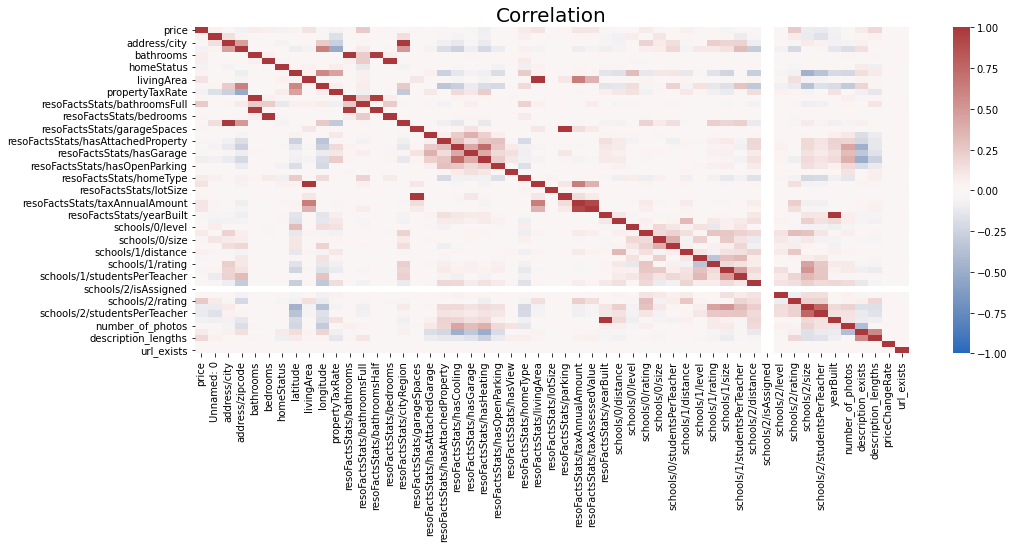

In [16]:
def plot_save_correlation():
    plt.figure(figsize=(16, 6))

    sns.heatmap(plot_df.corr(), vmin=-1, vmax=1, center=0, annot=False, cmap="vlag")

    plt.title("Correlation", fontsize=20)

    plt.savefig("static/correlation.png", format="png")
    plt.show()


plot_save_correlation()

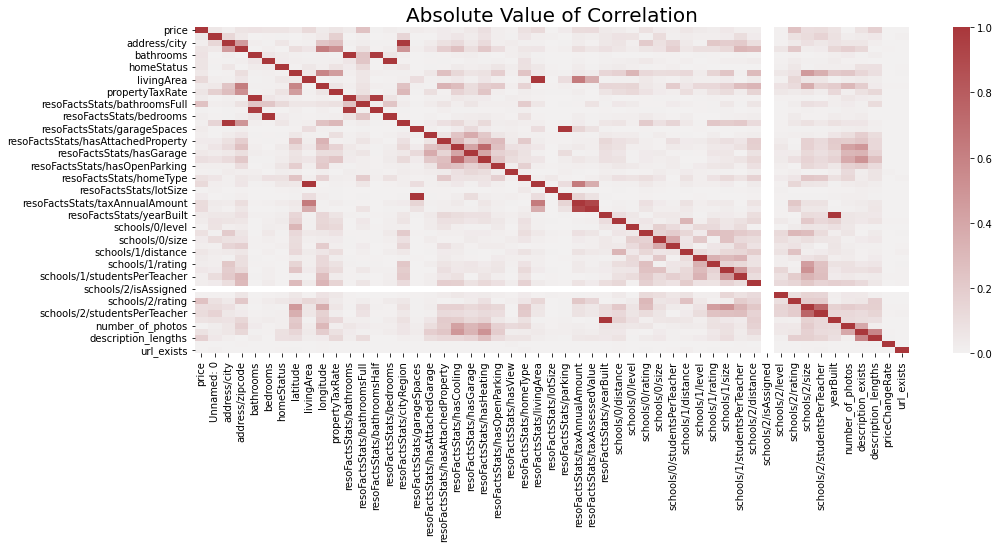

In [17]:
def plot_save_abs_correlation():
    plt.figure(figsize=(16, 6))

    sns.heatmap(
        plot_df.corr().abs(),
        vmin=0,
        vmax=1,
        annot=False,
        cmap=sns.color_palette("light:#a9373b", as_cmap=True),
    )

    plt.title("Absolute Value of Correlation", fontsize=20)

    plt.savefig("static/abs_correlation.png", format="png")
    plt.show()


plot_save_abs_correlation()

### Lasso Regression

In [18]:
# Lasso with 10 fold cross-validation
model = LassoCV(cv=10, random_state=0, max_iter = 10000)

# Fit model
model.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000, random_state=0)

In [19]:
# best value of penalization chosen by cross validation:
model.alpha_

132125.94727224633

In [20]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=132125.94727224633)

In [21]:
# model coefficients and names:
for beta, x in list(zip(lasso_best.coef_, X)):
  if abs(beta) > 0:
    print(x, ':', beta)

livingArea : 66144.12866408851
propertyTaxRate : -21984.06028449041
resoFactsStats/bathroomsFull : 188685.52703259126
resoFactsStats/homeType : 36716.71330477778
resoFactsStats/livingArea : 5932.700197263384
schools/0/rating : 16420.379086146524
schools/2/rating : 365105.24051429867
schools/2/studentsPerTeacher : -175249.75404408987
description_lengths : 233082.5079724662


In [22]:
# Model evaluation
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 8.53
R squared test set 7.49


In [23]:
# MSE
mean_squared_error(y_test, lasso_best.predict(X_test))

9439589670830.604

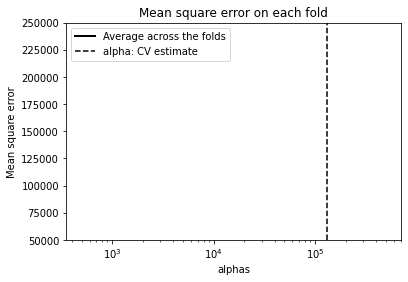

In [24]:
# Lasso path: plot results of cross-validation with mean squared erros
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 50000, 250000
plt.ylim(ymin, ymax);

With Interactions

In [25]:
print(df['schools/2/isAssigned'].unique())

[nan  1.]


In [26]:
# Create dummies of categorical data
dummify = ['address/city', 'address/zipcode', 'resoFactsStats/cityRegion', 'resoFactsStats/homeType']
X_new = X
X_new[dummify] = X_new[dummify].astype(str)
X_new = pd.get_dummies(X_new, prefix=dummify, columns=dummify)

In [27]:
# Columns with missing values
miss = X_new.columns[X_new.isnull().any()].tolist()
X_new[miss].isnull().sum()

bathrooms                          16938
bedrooms                           17425
latitude                               1
livingArea                          9147
longitude                              1
propertyTaxRate                       16
resoFactsStats/bathrooms           13493
resoFactsStats/bathroomsFull       17676
resoFactsStats/bathroomsHalf       17614
resoFactsStats/bedrooms            14379
resoFactsStats/hasCooling           2542
resoFactsStats/hasHeating           1082
resoFactsStats/livingArea           9118
resoFactsStats/lotSize             11091
resoFactsStats/taxAnnualAmount     10511
resoFactsStats/taxAssessedValue    12415
resoFactsStats/yearBuilt            5615
schools/0/distance                   127
schools/0/level                      127
schools/0/rating                     966
schools/0/size                       579
schools/0/studentsPerTeacher        1062
schools/1/distance                   865
schools/1/level                      865
schools/1/rating

In [28]:
# Dropping rows with missing values for EDA
X_new = X_new.dropna()

In [ ]:
# Create Interactions
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
poly.fit_transform(X_new)

print(X_new.head())

In [ ]:
# Redefine training and test sets
train_indices_new = X_new.index.intersection(train_indices)
#print(X_new.index, train_indices_new, train_indices)

X_train_new = X_new.loc[train_indices_new]
y_train_new = y.loc[train_indices_new]

X_test_new = X_new.loc[test_indices_new]
y_test_new = y.loc[test_indices_new]

In [ ]:
# Lasso with 10 fold cross-validation
model_new = LassoCV(cv=10, random_state=0, max_iter = 10000)

# Fit model
model_new.fit(X_train_new, y_train_new)

In [ ]:
# best value of penalization chosen by cross validation:
model_new.alpha_

In [ ]:
# Set best alpha
lasso_best_new = Lasso(alpha=model_new.alpha_)
lasso_best_new.fit(X_train_new, y_train_new)

In [ ]:
# model coefficients and names:
for beta, x in list(zip(lasso_best_new.coef_, X_new)):
  if abs(beta) > 0:
    print(x, ':', beta)

In [ ]:
# Model evaluation
print('R squared training set', round(lasso_best_new.score(X_train_new, y_train_new)*100, 2))
print('R squared test set', round(lasso_best_new.score(X_test_new, y_test_new)*100, 2))

In [ ]:
# MSE
mean_squared_error(y_test_new, lasso_best_new.predict(X_test_new))

In [ ]:
# Lasso path: plot results of cross-validation with mean squared erros
plt.semilogx(model_new.alphas_, model_new.mse_path_, ":")
plt.plot(
    model_new.alphas_ ,
    model_new.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model_new.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 50000, 250000
plt.ylim(ymin, ymax);